In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = """4000	10000	15000	50000	100000	1000000
-1175.36	-1177.35	-1177.27	-1171.93	-1169.86	-1169.23
-1250.44	-1250.77	-1250.59	0	0	0
-1166.39	-1163.91	-1163.39	0	0	0
-1150.96	-1146.59	-1144.88	-1136.57	-1133.94	-1129.27"""

In [3]:
np.fromstring(data, dtype=float, sep="	")

array([    4000.  ,    10000.  ,    15000.  ,    50000.  ,   100000.  ,
        1000000.  ,    -1175.36,    -1177.35,    -1177.27,    -1171.93,
          -1169.86,    -1169.23,    -1250.44,    -1250.77,    -1250.59,
              0.  ,        0.  ,        0.  ,    -1166.39,    -1163.91,
          -1163.39,        0.  ,        0.  ,        0.  ,    -1150.96,
          -1146.59,    -1144.88,    -1136.57,    -1133.94,    -1129.27])

In [4]:
data_size = np.fromstring(data, dtype=float, sep="	")[:6] / 1000.
FA = np.fromstring(data, dtype=float, sep="	" )[6:12]
ZIFA = np.fromstring(data, dtype=float, sep="	")[12:15]
ZINB = np.fromstring(data, dtype=float, sep="	")[18:21]
scVI  = np.fromstring(data, dtype=float, sep="	")[24:]

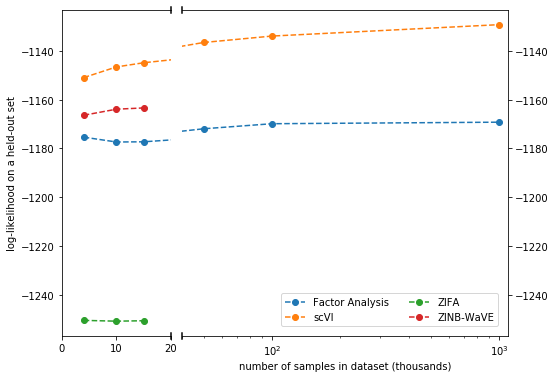

In [5]:
from matplotlib import gridspec
import matplotlib
fig = plt.figure(figsize=[8.0, 6.0]) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
gs.update(wspace=0.05, hspace=0.05)

ax_left = plt.subplot(gs[0])
ax_right = plt.subplot(gs[1], sharey=ax_left)

for ax in [ax_left, ax_right]:
    
    fa,  = ax.plot(data_size, FA, label="Factor Analysis", marker='o', linestyle='--',)
    scvi, = ax.plot(data_size, scVI, label="scVI", marker='o', linestyle='--',)
    zifa, = ax.plot(data_size[:3], ZIFA, label="ZIFA", marker='o', linestyle='--',)
    zinb, = ax.plot(data_size[:3], ZINB, label="ZINB-WaVE", marker='o', linestyle='--',)
    #fa,  = ax.plot(data_size, FA, label="Factor Analysis",marker='o', linestyle='--',)
    #scvi, = ax.plot(data_size, scVI, label="scVI", marker='o', linestyle='--',)
    #zifa, = ax.plot(data_size[:4], ZIFA, label="ZIFA", marker='o', linestyle='--',)
    #zinb, = ax.plot(data_size[:4], ZINB, label="ZINB-WaVE", marker='o', linestyle='--',)
    #simlr, = ax.plot(data_size[:4], SIMLR, label="SIMLR", marker='o', linestyle='--',)
    #biscuit, = ax.plot(data_size[:2], BISCUIT, label="BISCUIT", marker='o', linestyle='--',)
    #magic, = ax.plot(data_size[:4], MAGIC, label="MAGIC", marker='o', linestyle='--',)
    
    
# zoom-in / limit the view to different portions of the data
ax_left.set_xlim(0, 20)  # outliers only
ax_right.set_xlim(40, 1100)  # most of the data

# hide the spines between ax and ax2
ax_left.spines['right'].set_visible(False)
ax_right.spines['left'].set_visible(False)
ax_left.yaxis.tick_left()
#ax_right.tick_params(label='off')  # don't put tick labels at the top
ax_right.yaxis.tick_right()

ax_right.set_xlabel('number of samples in dataset (thousands)')
ax_left.set_ylabel('log-likelihood on a held-out set')

#ax_left.set_yscale('log')
#ax_left.set_yticks([0.01, 1, 10, 30, 60, 360])
ax_right.set_xscale('log')
#ax_right.set_xticks([1000])

ax_left.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax_left.transAxes, color='black', clip_on=False)
ax_left.plot((1,1),(-d,+d), **kwargs)
#t((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax_left.plot((1,1),(1-d,1+d), **kwargs)   # top-right diagonal

kwargs.update(transform=ax_right.transAxes)  # switch to the bottom axes
ax_right.plot((0,0),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax_right.plot((0,0),(-d,+d), **kwargs) # bottom-right diagonal


ax_right.legend(handles=[fa, scvi, zifa, zinb], ncol=2, bbox_to_anchor=(0., 0.0, 1., 0), loc=4, borderaxespad=1)
plt.savefig('loglikelihood.pdf', dpi=300)

In [6]:
def barplot(mean, alg, title, save=None):
    ind = np.arange(len(mean))  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111)
    rects1 = ax.barh(ind, mean, width, color='r')
    #ax.axvline(x=np.min(np.array(mean)[np.array(mean) > 0]), ymin=0, ymax = 5, linewidth=1, color='b')
 

    plt.xlim(1000,1400)
    
    # add some text for labels, title and axes ticks
    ax.set_xlabel(title)
    ax.set_yticks(ind)
    ax.set_yticklabels(alg)
    plt.tight_layout()

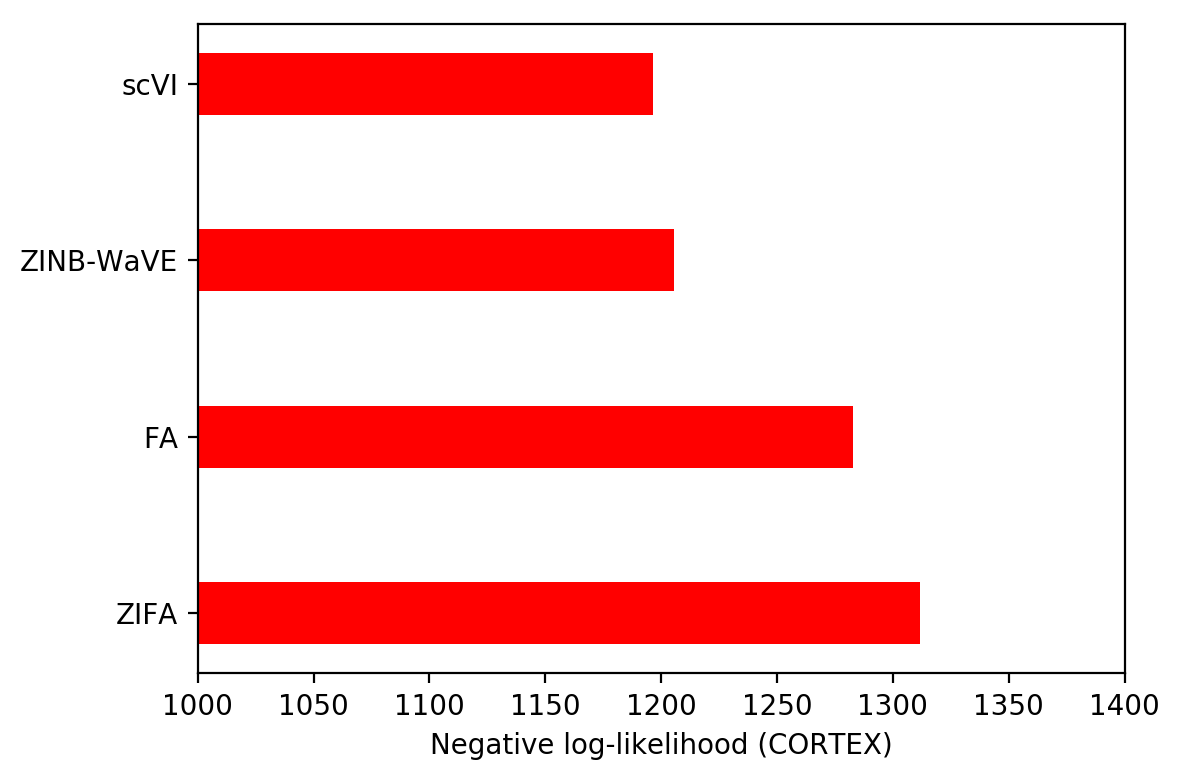

In [7]:
lik = [1311.61, 1282.89, 1205.74, 1196.3695]
barplot(lik, ["ZIFA", "FA" , "ZINB-WaVE", "scVI"], "Negative log-likelihood (CORTEX)")
plt.savefig("Zeiler_log.pdf", dpi=300)